# Finding Countries With the Longest Work Hours

Which countries have citizens putting in the longest work hours and how have these trends been changing over time? 

I will try to answer these questions by analyzing data from OECD Employment and Labour Market Statistics database which provides data on average annual labor hours for most developed countries dating back to 1950.

Data can be accessed here https://www.oecd-ilibrary.org/employment/data/hours-worked/average-annual-hours-actually-worked_data-00303-en



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
%matplotlib inline


In [2]:
# Read in the data
n_america = pd.read_csv('north_america_2000_2010.csv', index_col=0)
s_america = pd.read_csv('south_america_2000_2010.csv', index_col=0)

# Concatenating dataframes and them to a list
americas = pd.concat([n_america, s_america], axis = 0)

americas_dfs = [americas]

for year in range(2011, 2016):
    filename = f"americas_{year}.csv"
    df = pd.read_csv(filename, index_col=0)
    americas_dfs.append(df)
    
# Concatenating all dataframes into one and fix the index

americas = pd.concat(americas_dfs, axis = 1, sort=True)
americas.index.name = "Country"

In [3]:
 americas

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,
Canada,1779.0,1771.0,1754.0,1740.0,1760.0,1747,1745.0,1741.0,1735,1701.0,1703.0,1700.0,1713.0,1707.0,1703.0,1706.0
Chile,2263.0,2242.0,2250.0,2235.0,2232.0,2157,2165.0,2128.0,2095,2074.0,2069.6,2047.4,2024.0,2015.3,1990.1,1987.5
Mexico,2311.2,2285.2,2271.2,2276.5,2270.6,2281,2280.6,2261.4,2258,2250.2,2242.4,2250.2,2225.8,2236.6,2228.4,2246.4
USA,1836.0,1814.0,1810.0,1800.0,1802.0,1799,1800.0,1798.0,1792,1767.0,1778.0,1786.0,1789.0,1787.0,1789.0,1790.0


In these two data frames rows are countries and columns are years I am going to plot the data to see yearly labor trends

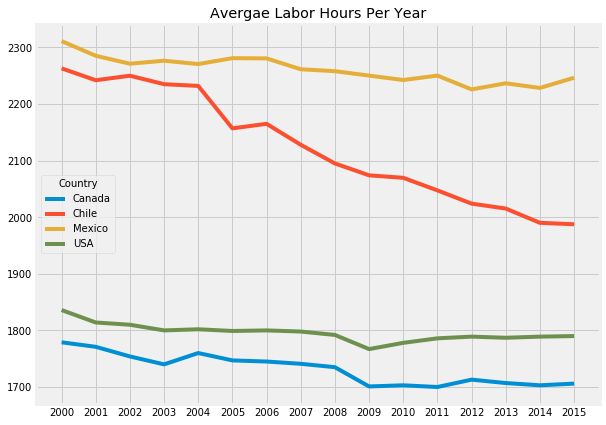

In [4]:
americas.transpose().plot(title='Avergae Labor Hours Per Year',figsize=(9,7))
plt.xticks( range(16), range(2000,2016) )
plt.show()


We can see a slight decline in working hours for Canada, USA, and Mexico. In Chile people are working way less hours than what they used to in 2000.

I will now add data from Asia, Europe and South Pacific

In [5]:
# Reading other continents data

# Asia
asia = pd.read_csv('asia_2000_2015.csv.', index_col = 0)

# Checking first 5 rows
asia.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,
Israel,2017,1979,1993,1974,1942,1931,1919,1931,1929,1927,1918,1920,1910,1867,1853,1858
Japan,1821,1809,1798,1799,1787,1775,1784,1785,1771,1714,1733,1728,1745,1734,1729,1719
Korea,2512,2499,2464,2424,2392,2351,2346,2306,2246,2232,2187,2090,2163,2079,2124,2113
Russia,1982,1980,1982,1993,1993,1989,1998,1999,1997,1974,1976,1979,1982,1980,1985,1978


In [6]:
# Europe
europe = pd.read_csv('europe_2000_2015.csv', index_col=0)

# Checking first 5 rows
europe.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,
Austria,1807.4,1794.6,1792.2,1783.8,1786.8,1764.0,1746.2,1736.0,1728.5,1673.0,1668.6,1675.9,1652.9,1636.7,1629.4,1624.9
Belgium,1595.0,1588.0,1583.0,1578.0,1573.0,1565.0,1572.0,1577.0,1570.0,1548.0,1546.0,1560.0,1560.0,1558.0,1560.0,1541.0
Switzerland,1673.6,1635.0,1614.0,1626.8,1656.5,1651.7,1643.2,1632.7,1623.1,1614.9,1612.4,1605.4,1590.9,1572.9,1568.3,1589.7
Czech Republic,1896.0,1818.0,1816.0,1806.0,1817.0,1817.0,1799.0,1784.0,1790.0,1779.0,1800.0,1806.0,1776.0,1763.0,1771.0,1779.0
Germany,1452.0,1441.9,1430.9,1424.8,1422.2,1411.3,1424.7,1424.4,1418.4,1372.7,1389.9,1392.8,1375.3,1361.7,1366.4,1371.0


In [7]:
#South Pacific
s_pacific = pd.read_csv('./south_pacific_2000_2015.csv', index_col=0)

#checking data
s_pacific

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,
Australia,1778.7,1736.7,1731.7,1735.8,1734.5,1729.2,1720.5,1712.5,1717.2,1690,1691.5,1699.5,1678.6,1662.7,1663.6,1665
New Zealand,1836.0,1825.0,1826.0,1823.0,1830.0,1815.0,1795.0,1774.0,1761.0,1740,1755.0,1746.0,1734.0,1752.0,1762.0,1757


In [8]:
# Appending data frames
world = americas.append([asia, europe, s_pacific])

# Number of countries
len(world.index)

36

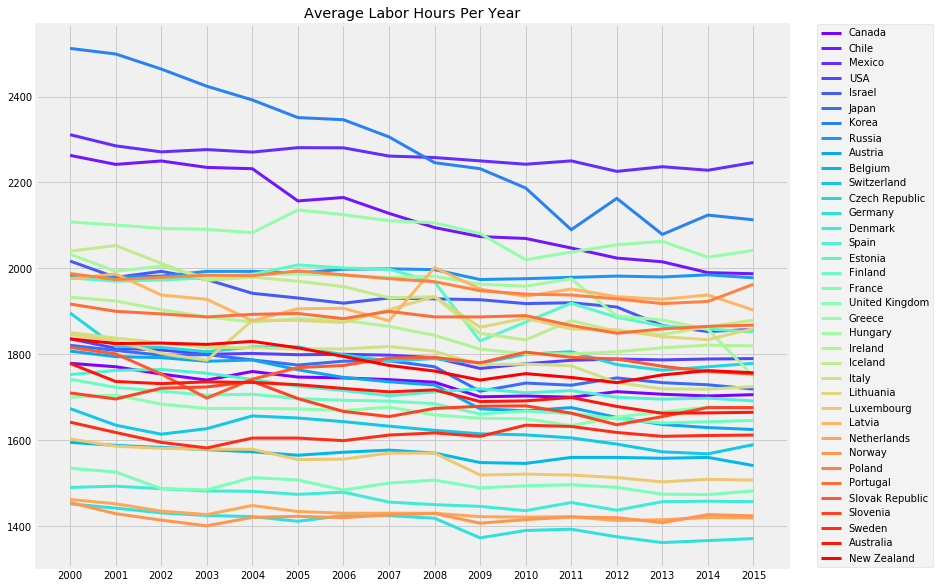

In [9]:
# Plotting the data

world.transpose().plot(title = 'Average Labor Hours Per Year', figsize = (12,10), colormap='rainbow', linewidth=3)
plt.xticks( range(16), range(2000,2016) )
plt.legend(loc='right',bbox_to_anchor=(1.2,0.5)) 
plt.show()

#### It is difuclt to analyze this graph with all these lines, I will creat an interactive line chart using Tableau to see how the average changed from 2000 to 2015

In [10]:
%%HTML 
<div class='tableauPlaceholder' id='viz1543027534528' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;R6&#47;R6ZC32SX2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;R6ZC32SX2' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;R6&#47;R6ZC32SX2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1543027534528');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

#### From the plot, we can see that the average hours range between 1300 and 2600 with Korea, Mexico, and Chile on the top. we can see that the average has been decreasing from 2000 to 2015, especially for Korea.
#### On the other hand, Germany, Norway, and the Netherlands at the bottom of the graph, which is very interesting since Germany is one of the top ten largest economies.
#### United States in the middle of the graph without a big change on the average from 2000 to 2015

#### Now I will merge the historical data from 1950 to 2000.

In [11]:
# Reading and checking the historical data
hist_data = pd.read_csv('./historical.csv', index_col=0)
hist_data.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
Country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1779.5,1774.90,1773.70,1786.50,1797.60,1793.400,1782.700,1783.600,1768.40,1778.8
Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1619.200,1637.150,1648.500,1641.65,1654.0
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1662.9,1625.79,1602.72,1558.59,1558.59,1515.835,1500.295,1510.315,1513.33,1514.5
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1789.5,1767.50,1766.00,1764.50,1773.00,1771.500,1786.500,1782.500,1778.50,1778.5
Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1673.10,1684.80,1685.80,1706.20,1685.500,1658.900,1648.600,1656.60,1678.4


In [12]:
# Checking the size of both dataframes to make sure they have same number of countries

world.shape, hist_data.shape

((36, 16), (39, 50))

#### It seems that there is three extra rows in the historical data, I am going to merege the two data frames using right join to drop the extra three rows in the hist_data using the index(country) as the key

In [13]:
world_hist = hist_data.join( world, how='right')
world_hist.shape

(36, 66)

In [14]:
# Checking the data
world_hist.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,,
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1745.0,1741.0,1735.0,1701.0,1703.0,1700.0,1713.0,1707.0,1703.0,1706.0
Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2165.0,2128.0,2095.0,2074.0,2069.6,2047.4,2024.0,2015.3,1990.1,1987.5
Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2280.6,2261.4,2258.0,2250.2,2242.4,2250.2,2225.8,2236.6,2228.4,2246.4
USA,1960.0,1975.5,1978.0,1980.0,1970.5,1992.5,1990.0,1962.0,1936.5,1947.0,...,1800.0,1798.0,1792.0,1767.0,1778.0,1786.0,1789.0,1787.0,1789.0,1790.0
Israel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1919.0,1931.0,1929.0,1927.0,1918.0,1920.0,1910.0,1867.0,1853.0,1858.0


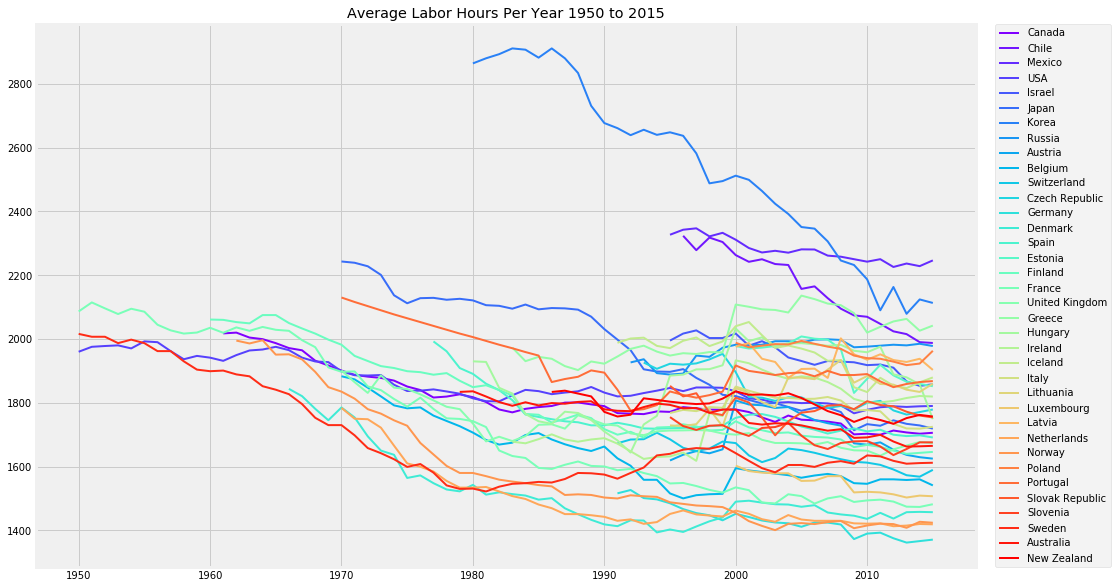

In [15]:
# Plotting the data

ax = world_hist.transpose().plot(figsize=(15,10), colormap='rainbow', linewidth=2, 
                                 title='Average Labor Hours Per Year 1950 to 2015')
ax.set_xticklabels(range(1940,2020,10))
plt.legend(loc='right', bbox_to_anchor=(1.15, 0.5))
plt.show()

### I have saved the data frame to a file and used it in Tableau for an interactive chart

In [16]:
%%HTML
<div class='tableauPlaceholder' id='viz1543031050529' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Av&#47;AverageLaborHoursPerYear1950to2015&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='AverageLaborHoursPerYear1950to2015&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Av&#47;AverageLaborHoursPerYear1950to2015&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1543031050529');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## Summary

#### From the graph, we can see that the average has been decreasing especially for countries like South Korea, Japan, Chile, and most of the European Union countries. In Greece, it seems that people are working more hours than they used to in the 80s.

#### It is interesting to see that people in countries like South Korea and Germany are working fewer hours than they used to, but they are in the world's top economies list.  I guess they work smart not hard :)
